# Example of a thermally responsive mass-spring lattice


## Imports


In [1]:
from morphing_lattices.plotting import plot_lattice
from morphing_lattices.structure import ControlParams, Lattice
from morphing_lattices.dynamics import setup_dynamic_solver
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax._src.config import config
config.update("jax_enable_x64", True)  # enable float64 type

# %matplotlib widget
plt.style.use(["science", "grid"])


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


## Structure

(<Figure size 500x500 with 1 Axes>,
 <Axes: title={'center': 'Lattice'}, xlabel='$x$', ylabel='$y$'>)

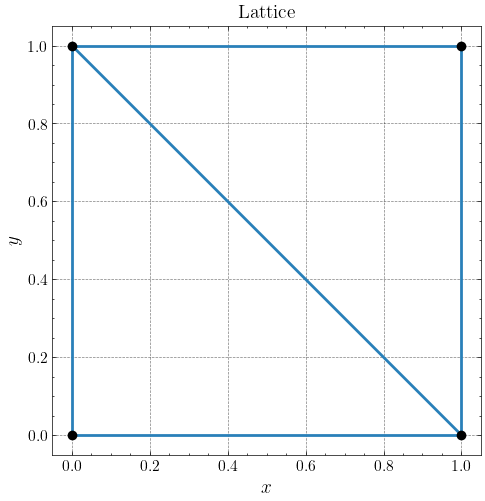

In [4]:
points = jnp.array([[0., 0], [1, 0], [1, 1], [0, 1]])
connectivity = jnp.array([[0, 1], [1, 2], [2, 3], [3, 0], [1, 3]])
n_points = points.shape[0]
n_bonds = connectivity.shape[0]

control_params = ControlParams(
    reference_points=points,
    young=jnp.ones(n_bonds),
    area=jnp.ones(n_bonds),
    thermal_strain=0.1*jnp.ones(n_bonds),
    damping=0.1*jnp.ones((n_points, 2)),
    masses=1.*jnp.ones((n_points, 2)),
)
lattice = Lattice(
    connectivity=connectivity,
    control_params=control_params
)
plot_lattice(lattice)


### Free space


In [5]:
# Initial conditions
state0 = jnp.array([
    0*lattice.control_params.reference_points,  # Initial displacements
    0*lattice.control_params.reference_points,  # Initial velocities
])
timepoints = jnp.linspace(0, 100, 200)

solve_dynamics, _ = setup_dynamic_solver(lattice=lattice)
lattice.solution = solve_dynamics(state0, timepoints, lattice.control_params)


(<Figure size 500x500 with 1 Axes>,
 <Axes: title={'center': 'Final state'}, xlabel='$x$', ylabel='$y$'>)

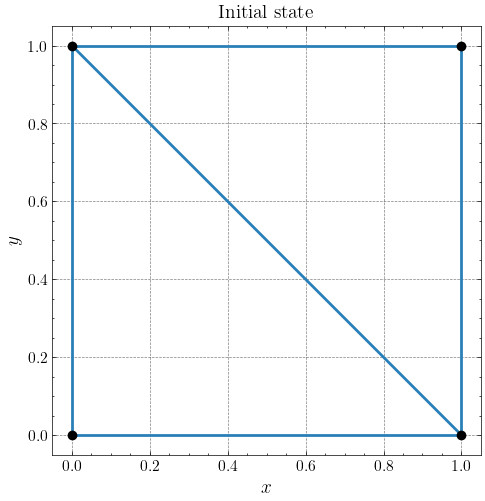

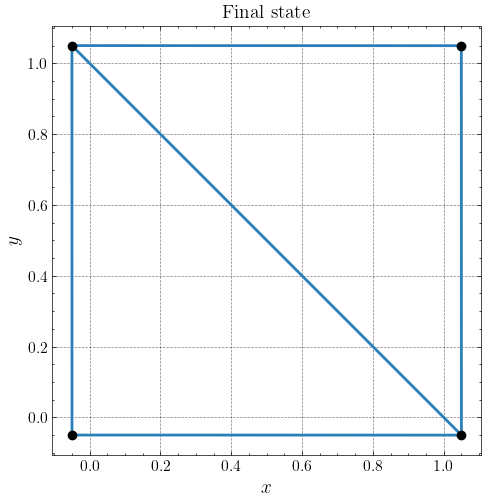

In [6]:
plot_lattice(lattice, lattice.solution[0, 0], title='Initial state')
plot_lattice(lattice, lattice.solution[-1, 0], title='Final state')


### Bottom nodes constrained


In [7]:
# Initial conditions
state0 = jnp.array([
    0*lattice.control_params.reference_points,  # Initial displacements
    0*lattice.control_params.reference_points,  # Initial velocities
])
timepoints = jnp.linspace(0, 100, 200)

solve_dynamics, _ = setup_dynamic_solver(
    lattice=lattice,
    constrained_point_DOF_pairs=jnp.array([[0, 0], [0, 1], [1, 0], [1, 1]]),
)
lattice.solution = solve_dynamics(state0, timepoints, lattice.control_params)


(<Figure size 500x500 with 1 Axes>,
 <Axes: title={'center': 'Final state'}, xlabel='$x$', ylabel='$y$'>)

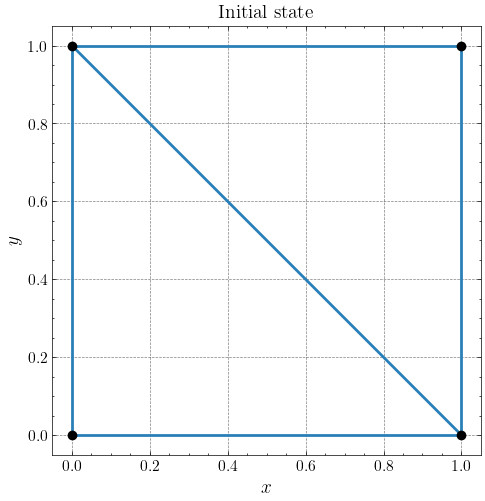

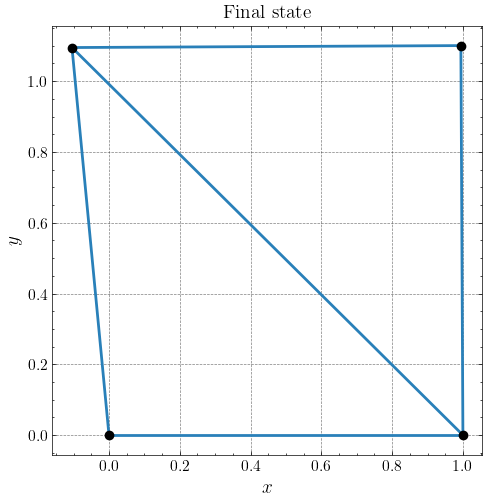

In [8]:
plot_lattice(lattice, lattice.solution[0, 0], title='Initial state')
plot_lattice(lattice, lattice.solution[-1, 0], title='Final state')


### Free space, variable params


In [9]:
# Initial conditions
state0 = jnp.array([
    0*lattice.control_params.reference_points,  # Initial displacements
    0*lattice.control_params.reference_points,  # Initial velocities
])
timepoints = jnp.linspace(0, 100, 200)


def control_params_fn(t, control_params: ControlParams):
    # NOTE: This will be replace by the experimental temperature-dependent behavior.
    return control_params._replace(
        young=control_params.young,
        thermal_strain=control_params.thermal_strain*2*(t/timepoints[-1]),
    )


solve_dynamics, _ = setup_dynamic_solver(lattice=lattice, control_params_fn=control_params_fn)
lattice.solution = solve_dynamics(state0, timepoints, lattice.control_params)


(<Figure size 500x500 with 1 Axes>,
 <Axes: title={'center': 'Final state'}, xlabel='$x$', ylabel='$y$'>)

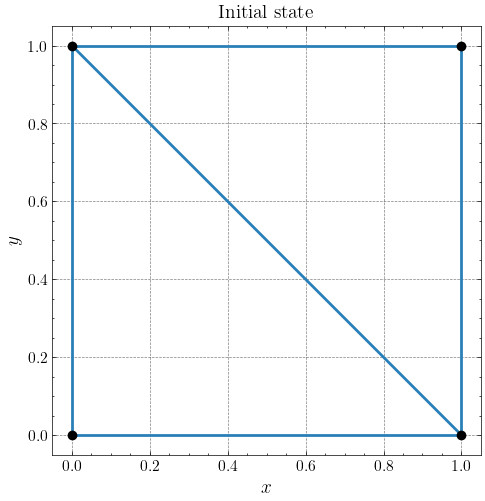

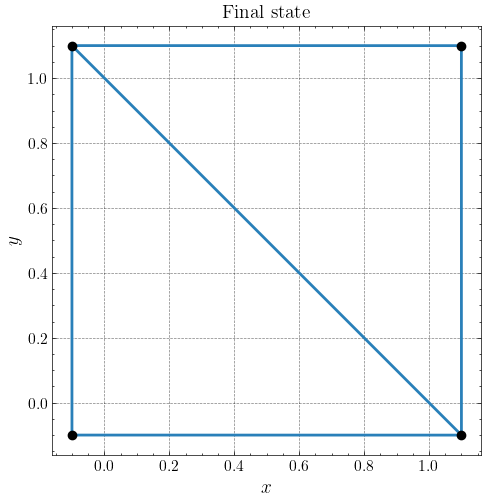

In [10]:
plot_lattice(lattice, lattice.solution[0, 0], title='Initial state')
plot_lattice(lattice, lattice.solution[-1, 0], title='Final state')
